### CL653- Optimizing Solar Energy Systems with Accurate Solar Radiation Prediction using Machine Learning


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [39]:
data = pd.read_csv('/content/SolarPrediction.csv')

In [40]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


### Exploratory Data Analysis

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [42]:
data.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [43]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


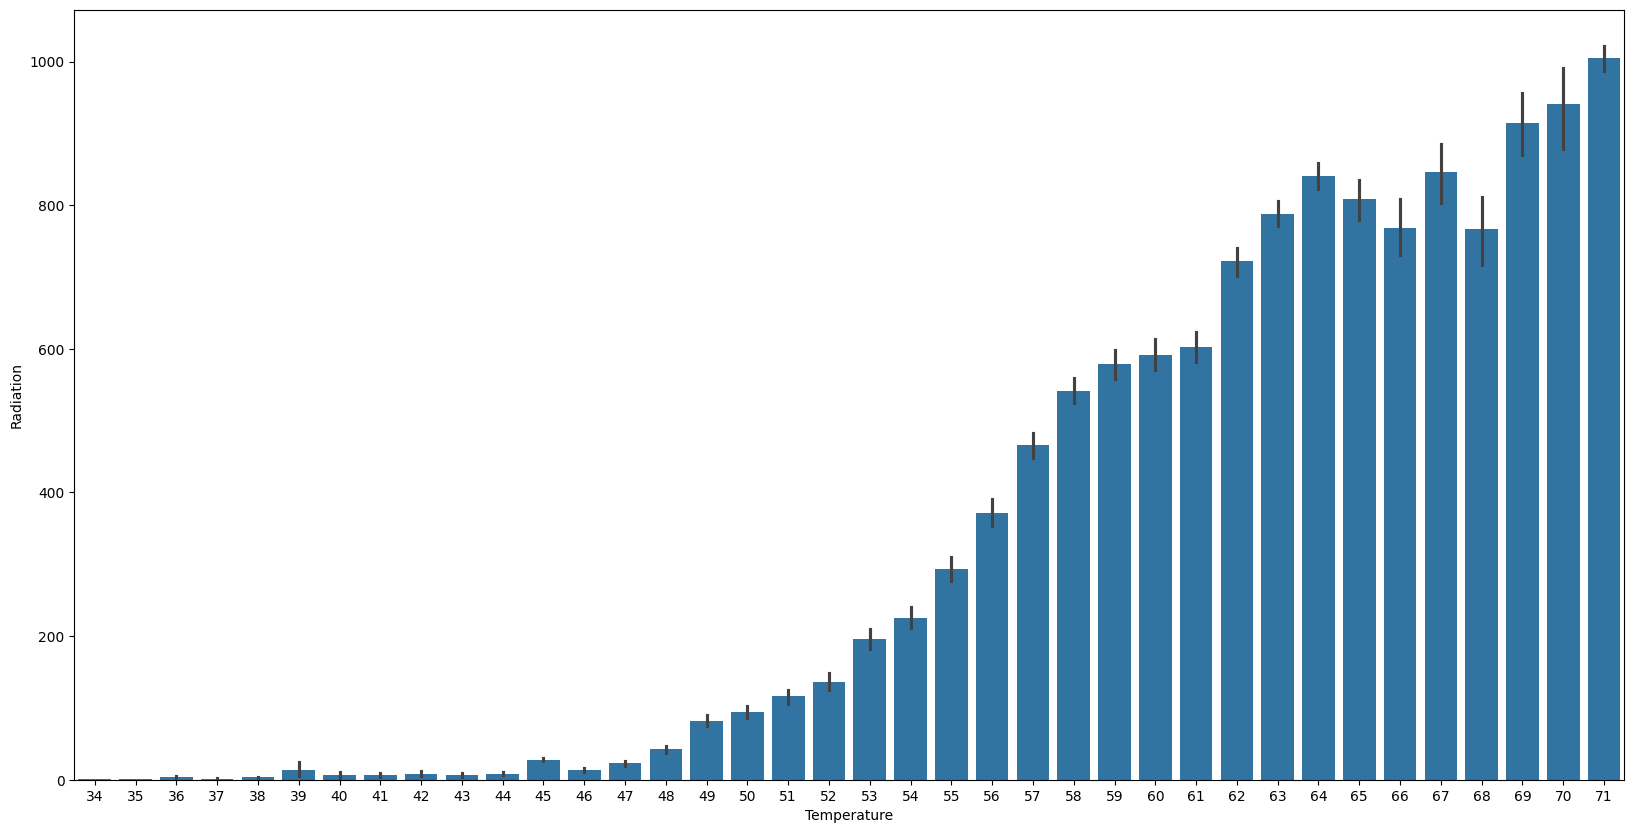

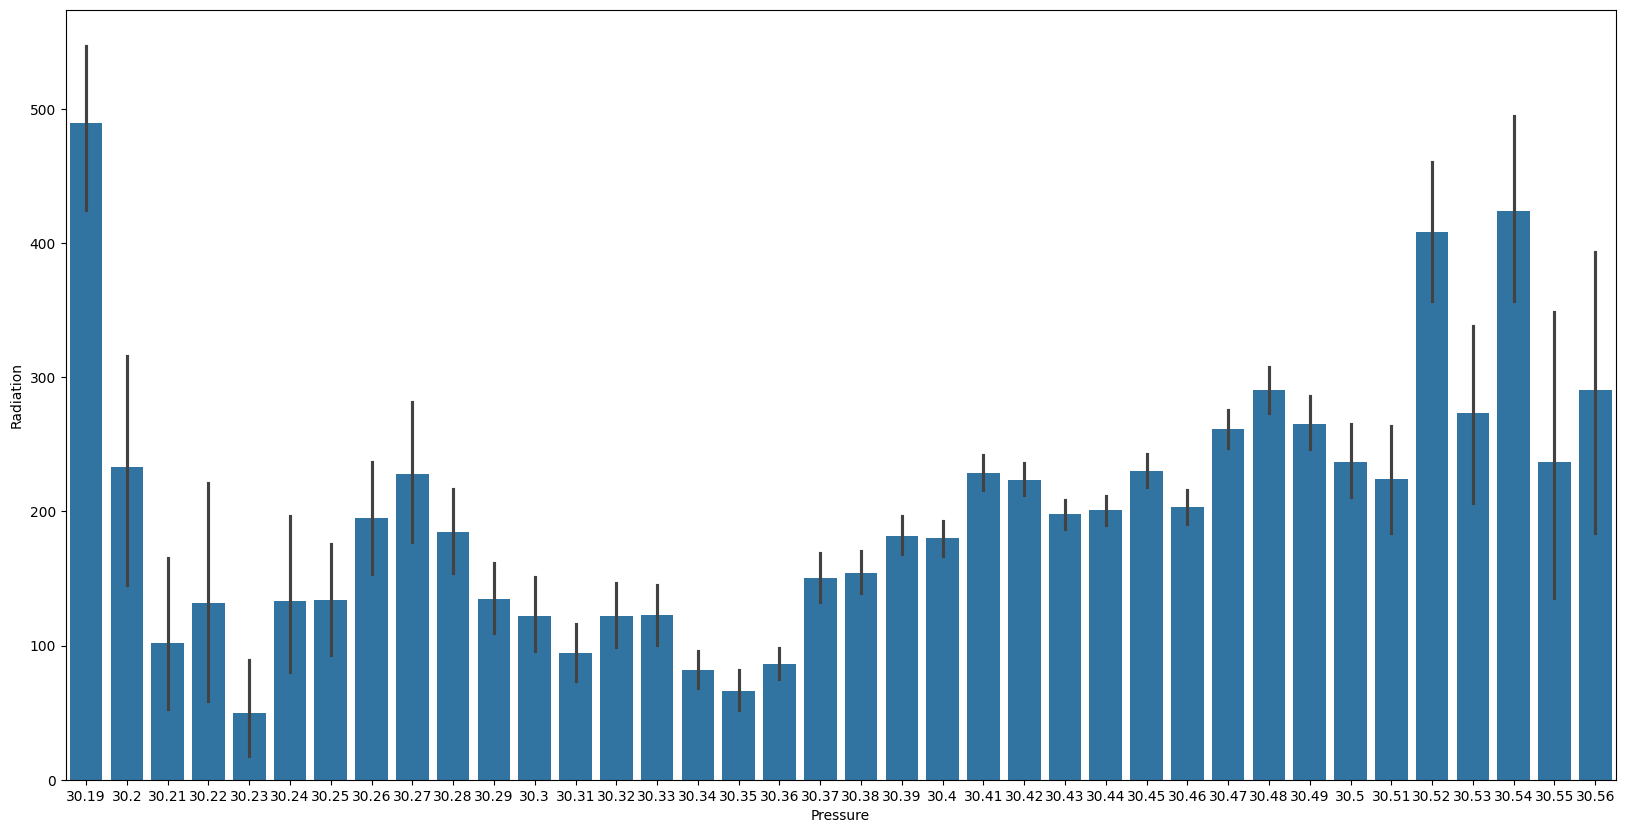

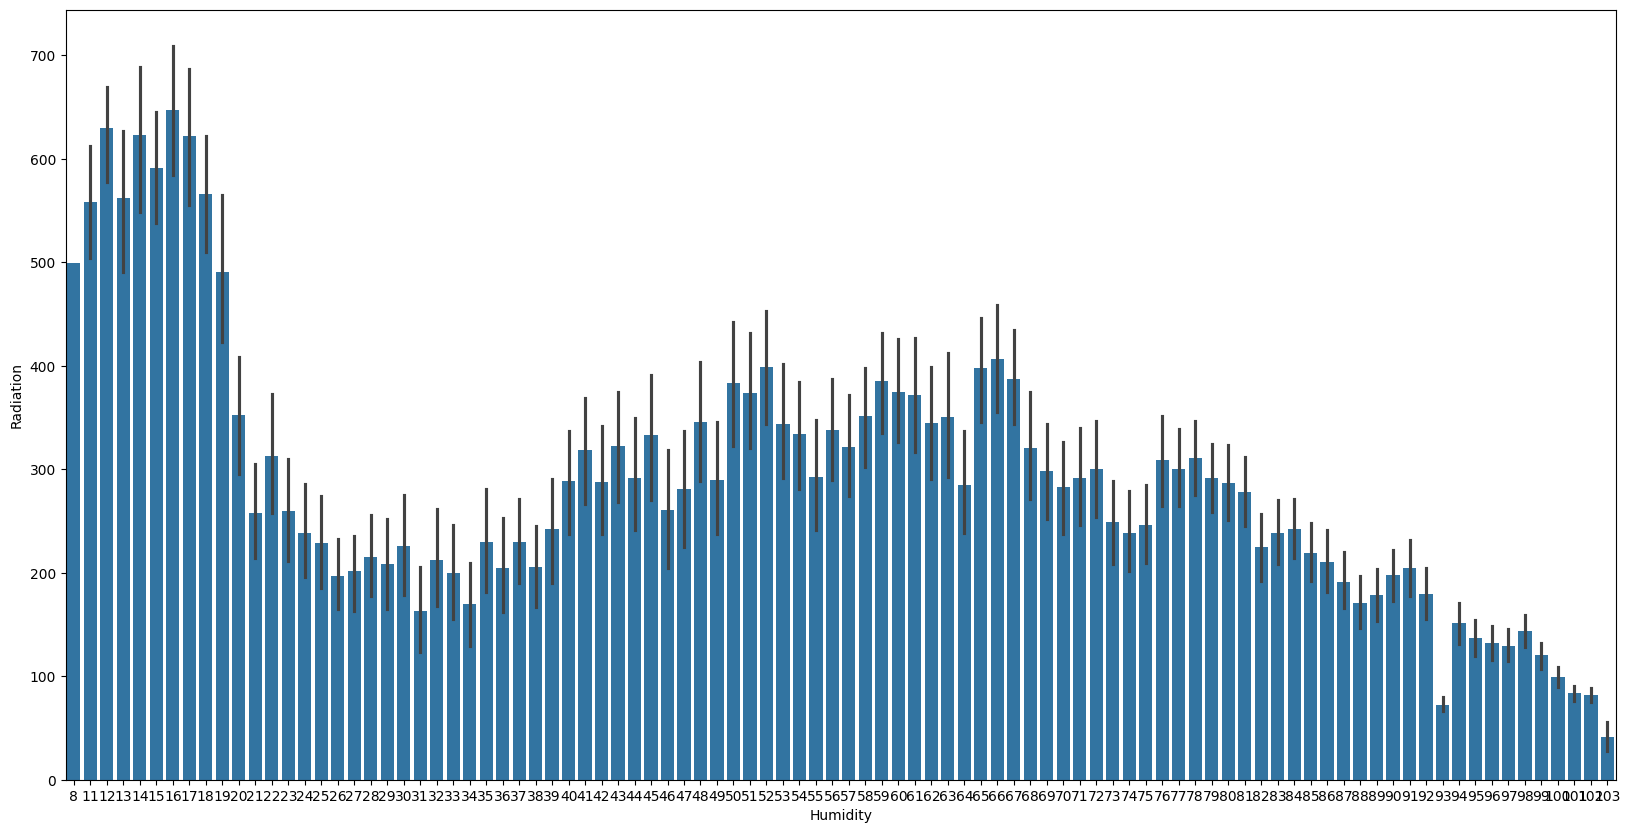

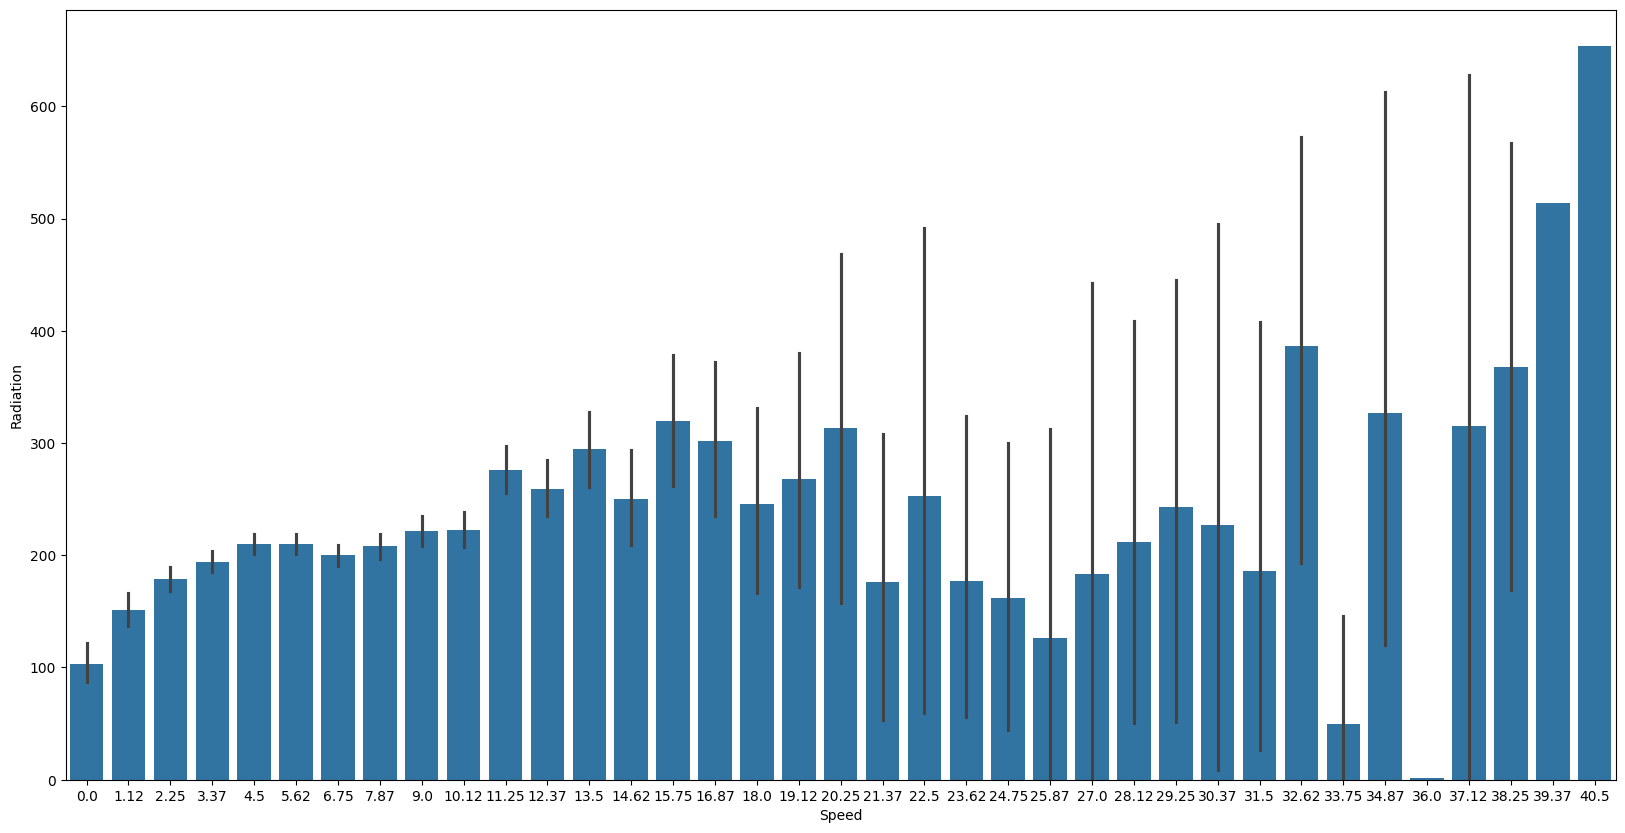

In [44]:
cols = ['Temperature','Pressure', 'Humidity', 'Speed']

for col in cols:
    fig2 = plt.figure(figsize=(20,10))
    sns.barplot(x=data[col],y=data['Radiation'])
    plt.show()

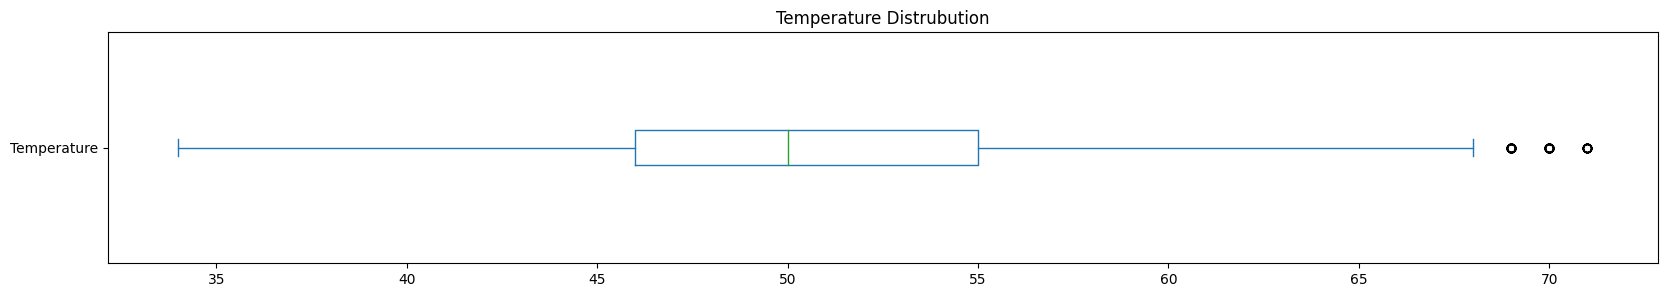

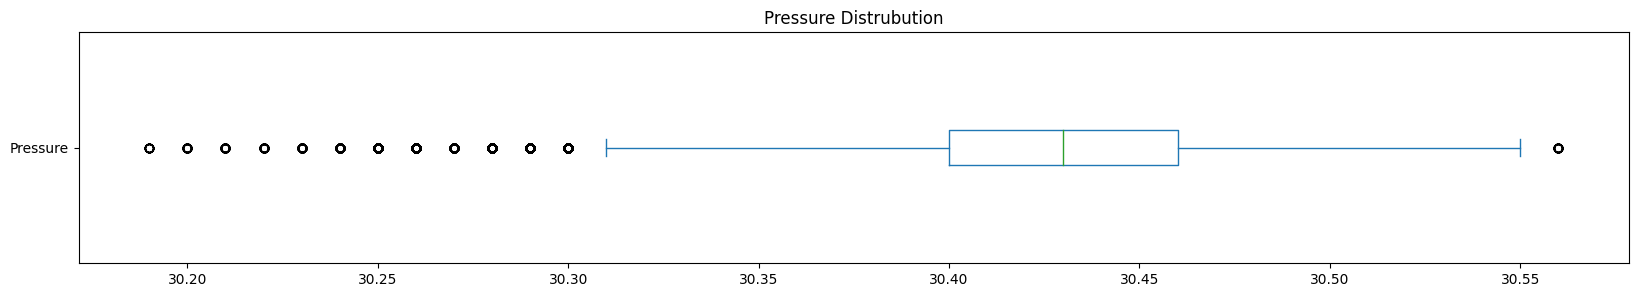

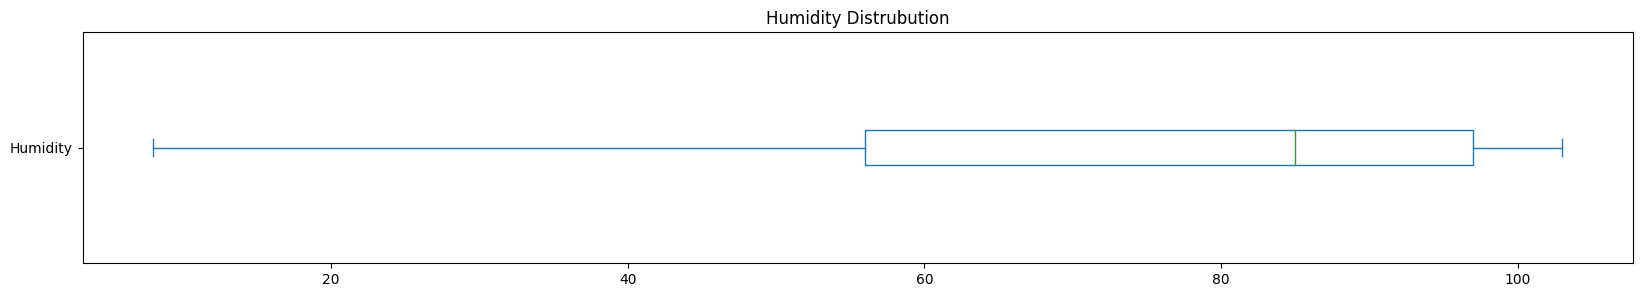

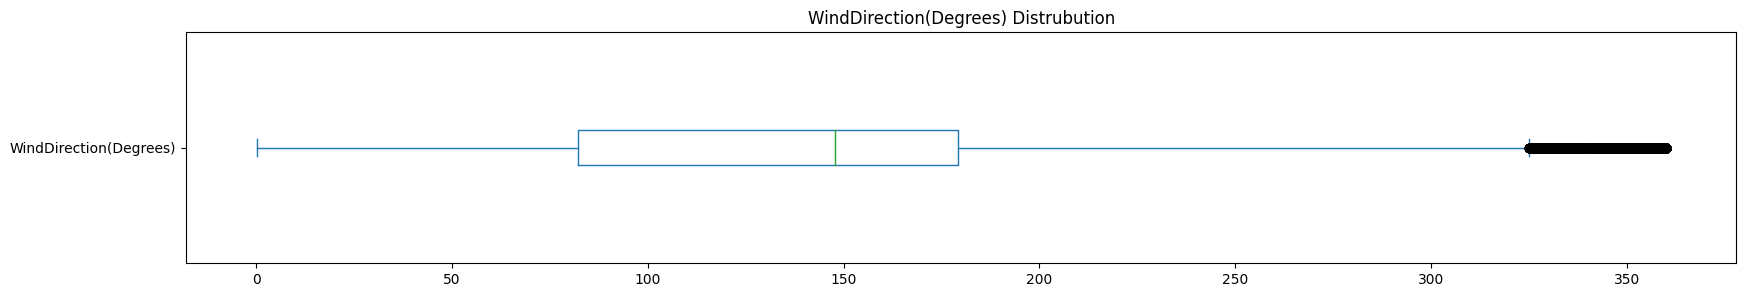

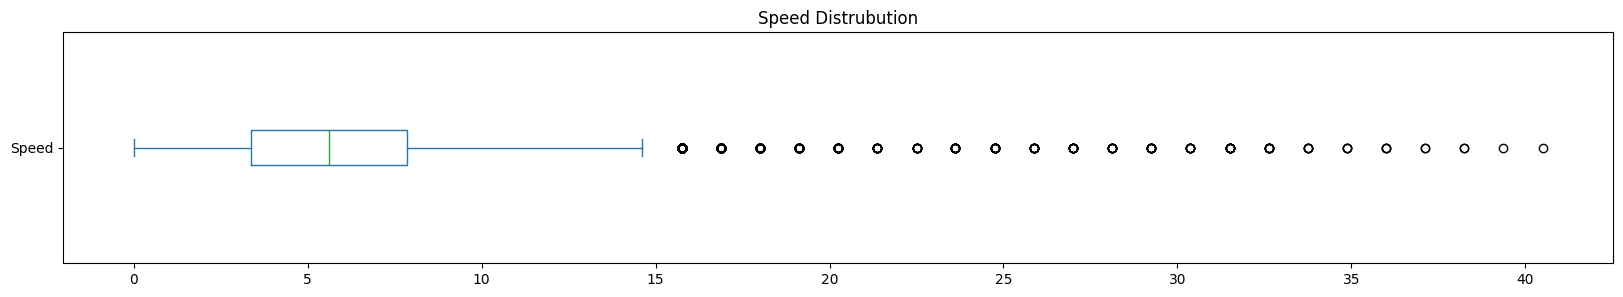

In [45]:
for col in ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']:
    fig, ax = plt.subplots(figsize=(20, 3))
    data[col].plot.box(ax=ax, vert=False)
    ax.set_title(f'{col} Distrubution')
    plt.show()

# Feature Selection and Engineering

In [46]:
import datetime

#Date

data['Year'] = pd.DatetimeIndex(data['Data']).year
data['Month'] = pd.DatetimeIndex(data['Data']).month
data['Day'] = pd.DatetimeIndex(data['Data']).day

#Time

data['Hour'] = pd.DatetimeIndex(data['Time']).hour
data['Minute'] = pd.DatetimeIndex(data['Time']).minute
data['Second'] = pd.DatetimeIndex(data['Time']).second

data['SunPerDayHours'] = pd.DatetimeIndex(data['TimeSunSet']).hour - pd.DatetimeIndex(data['TimeSunRise']).hour



In [47]:
data.drop(['Data', 'Time','TimeSunRise','TimeSunSet'], axis = 1, inplace=True)
data.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1475229326,1.21,48,30.46,59,177.39,5.62,2016,9,29,23,55,26,12
1,1475229023,1.21,48,30.46,58,176.78,3.37,2016,9,29,23,50,23,12
2,1475228726,1.23,48,30.46,57,158.75,3.37,2016,9,29,23,45,26,12
3,1475228421,1.21,48,30.46,60,137.71,3.37,2016,9,29,23,40,21,12
4,1475228124,1.17,48,30.46,62,104.95,5.62,2016,9,29,23,35,24,12


In [48]:
lag_window = 1

# Add lag features for the target variable
data['Radiation_lag'] = data['Radiation'].shift(lag_window)

In [49]:
data.drop(data.index[0], inplace=True)

In [50]:
data.drop('Year', axis = 1, inplace=True) #All year values are same

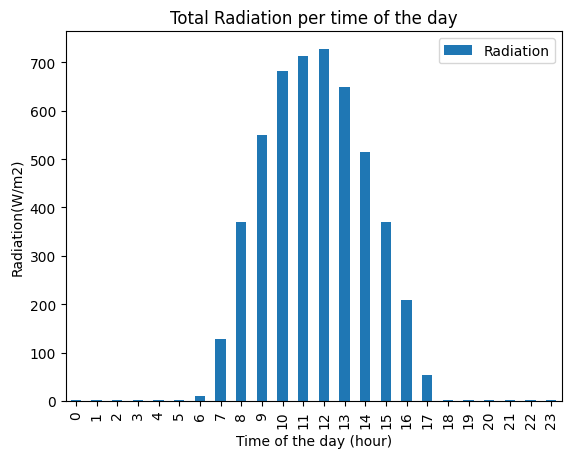

In [51]:
rad_vs_hour=data.loc[:, ['Radiation', 'Hour']].groupby('Hour').mean()
rad_vs_hour.plot(kind='bar')
plt.xlabel('Time of the day (hour)')
plt.ylabel('Radiation(W/m2)')
plt.title('Total Radiation per time of the day')
plt.show()

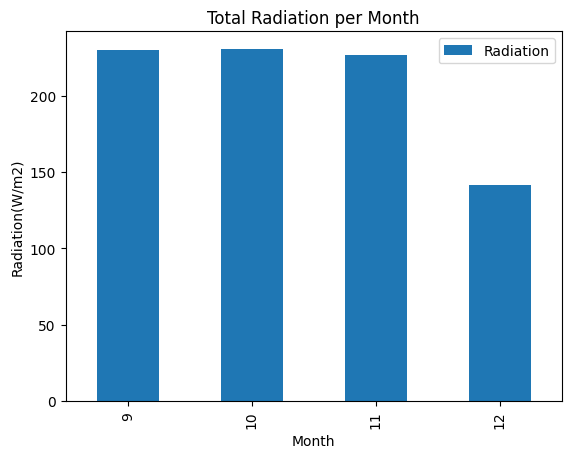

In [52]:
rad_vs_month=data.loc[:, ['Radiation', 'Month']].groupby('Month').mean()
rad_vs_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Radiation(W/m2)')
plt.title('Total Radiation per Month')
plt.show()

<Axes: >

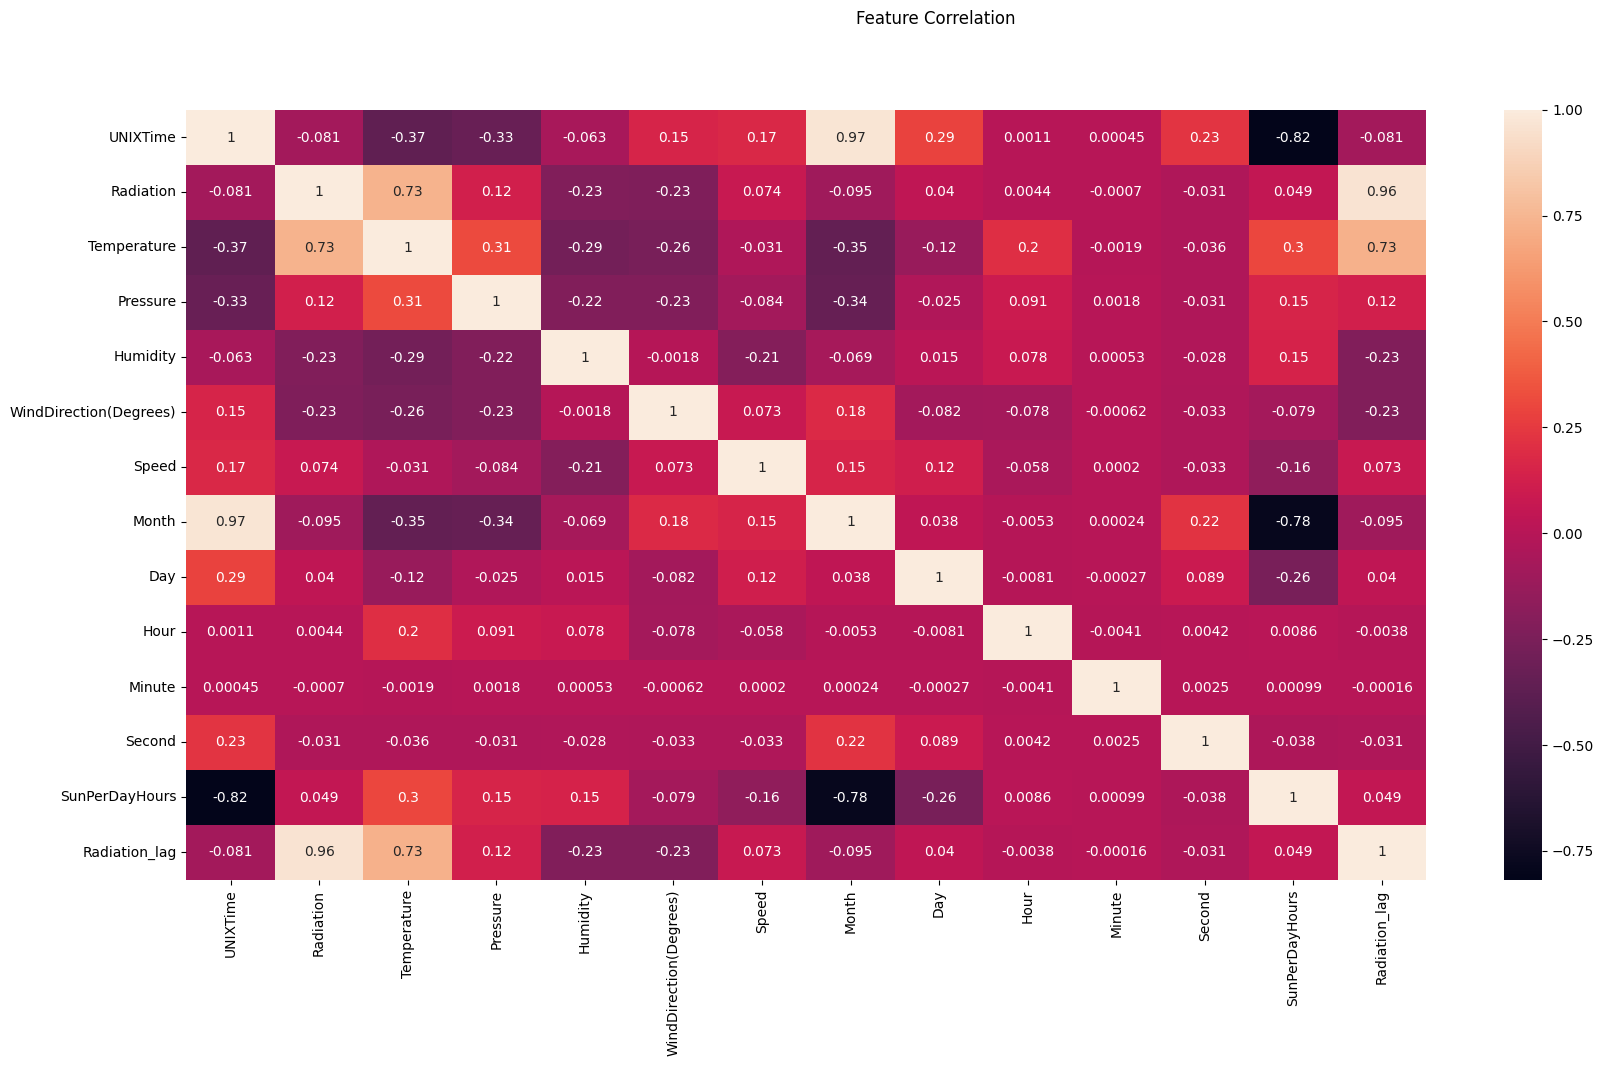

In [53]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Feature Correlation')
sns.heatmap(data.corr(), annot=True)

In [54]:
# Eliminating the pozitive correlated data
data.drop('UNIXTime', axis = 1, inplace=True) #Month and UnixTime have strong correlation


In [55]:
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,SunPerDayHours,Radiation_lag
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,12,1.21
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,12,1.21
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,12,1.23
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,12,1.21
5,1.21,48,30.46,64,120.20,5.62,9,29,23,30,24,12,1.17


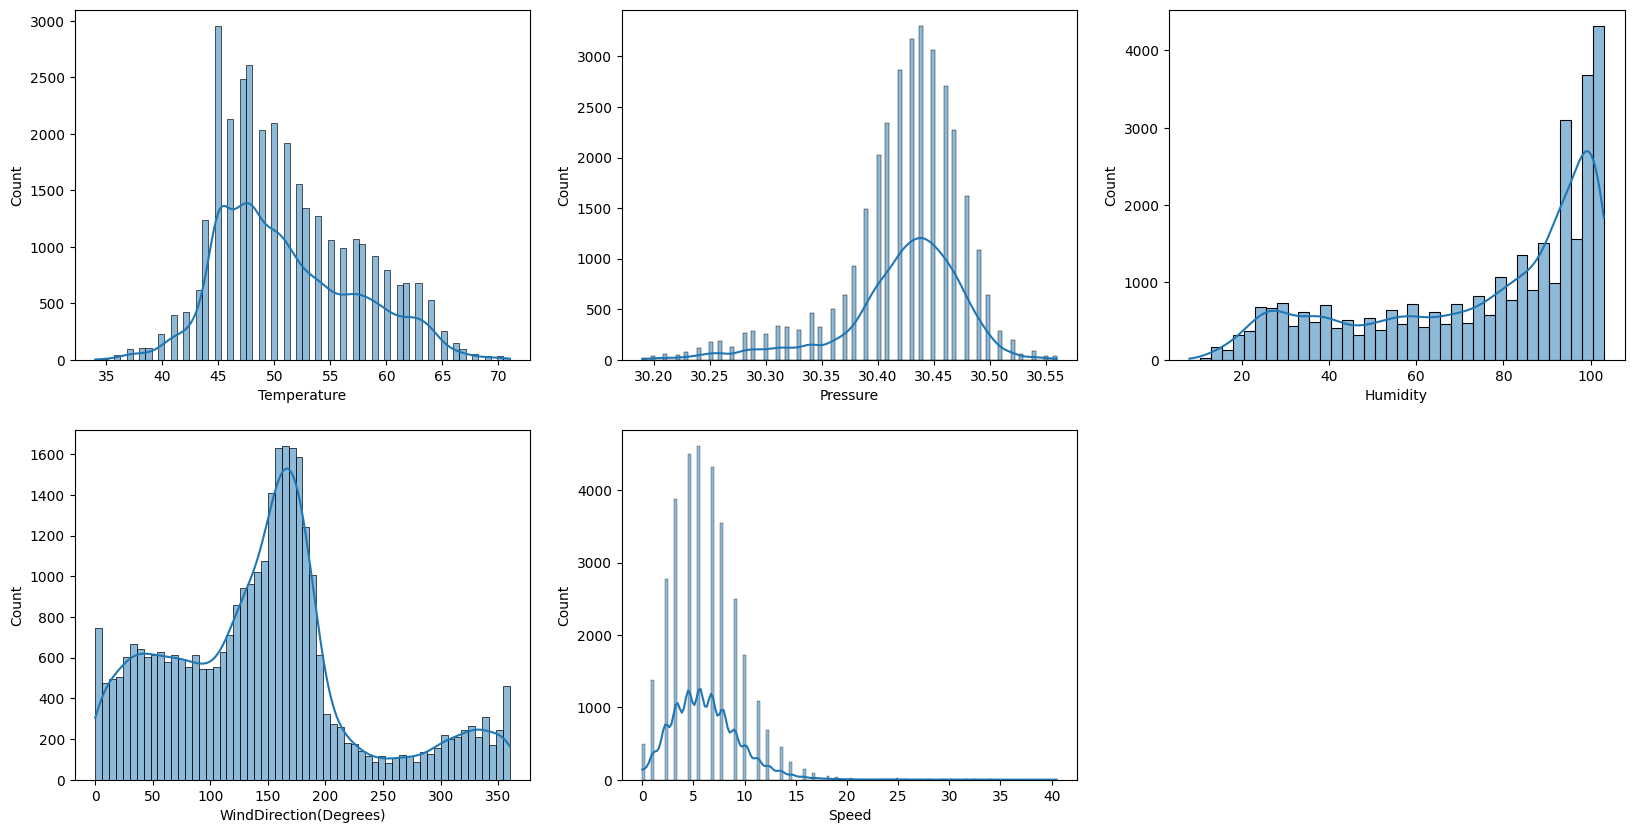

In [56]:
plt.figure(figsize=(20,10))

distr = data[["Temperature","Pressure","Humidity","WindDirection(Degrees)","Speed"]]

for i, column in enumerate(distr):
    plt.subplot(2,3,i+1)
    sns.histplot(distr[column],kde=True)

## Normalization and One-Hot Encoding


In [57]:
data.columns

Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Month', 'Day', 'Hour', 'Minute',
       'Second', 'SunPerDayHours', 'Radiation_lag'],
      dtype='object')

In [58]:
features_to_normalize = ['Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed']

# Create the scaler object
scaler = MinMaxScaler()

# Fit and transform the selected features
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

In [59]:
cat_cols = ['Month', 'Day', 'Hour', 'Minute',
       'Second', 'SunPerDayHours']

# Apply one-hot encoding using get_dummies
data = pd.get_dummies(data, columns=cat_cols)

In [60]:
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Radiation_lag,Month_9,Month_10,Month_11,...,Second_52,Second_53,Second_54,Second_55,Second_56,Second_57,Second_58,Second_59,SunPerDayHours_11,SunPerDayHours_12
1,1.21,0.378378,0.72973,0.526316,0.490996,0.083210,1.21,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1.23,0.378378,0.72973,0.515789,0.440894,0.083210,1.21,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.21,0.378378,0.72973,0.547368,0.382426,0.083210,1.23,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1.17,0.378378,0.72973,0.568421,0.291391,0.138765,1.21,True,False,False,...,False,False,False,False,False,False,False,False,False,True
5,1.21,0.378378,0.72973,0.589474,0.333769,0.138765,1.17,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [61]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [62]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 60)

# Models

##### I have used regression models here and not any time series models because the aim of my project is not to forecast future data but rather about understanding the relationship between the features and solar radiation.

In [63]:
mae_list = []
mse_list = []
r2_list = []

## Linear Regression

In [64]:
Model1 = LinearRegression()
Model1.fit(train_data, train_labels)
Pred1 = Model1.predict(test_data)

In [65]:
# Evaluation
mae_list.append(mean_absolute_error(test_labels, Pred1))
mse_list.append(mean_squared_error(test_labels, Pred1))
r2_list.append(r2_score(test_labels, Pred1))

print('MAE : ', mean_absolute_error(test_labels, Pred1))
print('MSE : ', mean_squared_error(test_labels, Pred1))
print('R^2 : ', r2_score(test_labels, Pred1))

MAE :  37.90335679303127
MSE :  7088.017965892311
R^2 :  0.9296857618817973


## RandomForestRegressor

In [66]:
Model2 = RandomForestRegressor()
Model2.fit(train_data, train_labels)
Pred2 = Model2.predict(test_data)

In [67]:
# Evaluation
mae_list.append(mean_absolute_error(test_labels, Pred2))
mse_list.append(mean_squared_error(test_labels, Pred2))
r2_list.append(r2_score(test_labels, Pred2))

print('MAE : ', mean_absolute_error(test_labels, Pred2 ))
print('MSE : ', mean_squared_error(test_labels, Pred2 ))
print('R^2 : ', r2_score(test_labels, Pred2 ))

MAE :  27.677721084189916
MSE :  6584.124369742634
R^2 :  0.9346844645482408


## Decission Trees

In [68]:
Model3 = DecisionTreeRegressor()
Model3.fit(train_data, train_labels)
Pred3 = Model3.predict(test_data)

In [69]:
mae_list.append(mean_absolute_error(test_labels, Pred3))
mse_list.append(mean_squared_error(test_labels, Pred3))
r2_list.append(r2_score(test_labels, Pred3))


print('MAE : ', mean_absolute_error(test_labels, Pred3 ))
print('MSE : ', mean_squared_error(test_labels, Pred3 ))
print('R^2 : ', r2_score(test_labels, Pred3 ))

MAE :  36.768576847772884
MSE :  11480.365133932943
R^2 :  0.8861129963840815


# Model Evaluation

In [70]:
print('      LinearRegression      RandomForest          DecisionTrees')
print('MAE',mae_list)
print('MSE',mse_list)
print('R2',r2_list)

      LinearRegression      RandomForest          DecisionTrees
MAE [37.90335679303127, 27.677721084189916, 36.768576847772884]
MSE [7088.017965892311, 6584.124369742634, 11480.365133932943]
R2 [0.9296857618817973, 0.9346844645482408, 0.8861129963840815]


Text(0.5, 1.0, 'R^2 Error')

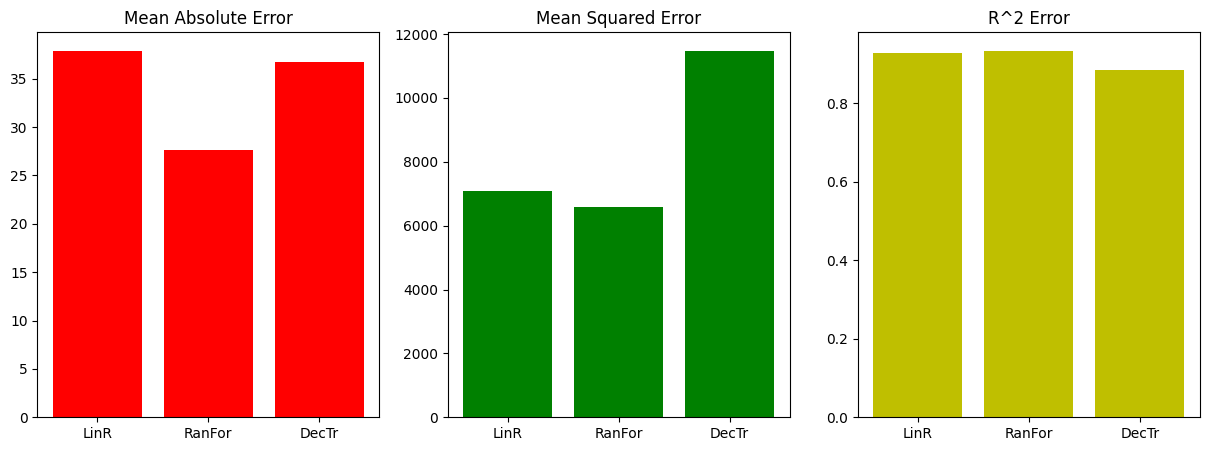

In [71]:
plot_labels = ["LinR", "RanFor", "DecTr"]


f, [ax1, ax2, ax3] = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1.bar(plot_labels,mae_list,color='r')
ax1.set_title("Mean Absolute Error")
ax2.bar(plot_labels,mse_list,color='g')
ax2.set_title("Mean Squared Error")
ax3.bar(plot_labels,r2_list,color='y')
ax3.set_title("R^2 Error")



In [72]:
Model2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
from tqdm import tqdm

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=Model2,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the RandomizedSearchCV object to the training data
for _ in tqdm(range(1), desc="Hyperparameter tuning"):
    random_search.fit(train_data, train_labels)

# Print the best hyperparameters and best score
print('Best parameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)


Hyperparameter tuning:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
Hyperparameter tuning: 100%|██████████| 1/1 [06:51<00:00, 411.45s/it]

Best parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10}
Best score: 0.9371865982709379


In [74]:
print('Best parameters:', random_search.best_params_)

Best parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10}


In [75]:
# Evaluate the best model on the test set
y_pred = random_search.predict(test_data)
print('R-squared score:', r2_score(test_labels, y_pred))
print('MSE:', mean_squared_error(test_labels, y_pred))

R-squared score: 0.9356035801001373
MSE: 6491.473041662797


In [76]:
Model4 = RandomForestRegressor(max_depth = None, max_features= 'sqrt',
                               min_samples_leaf = 1, min_samples_split = 2, n_estimators = 150)
Model4.fit(train_data, train_labels)
Pred4 = Model4.predict(test_data)

print('MAE : ', mean_absolute_error(test_labels, Pred4 ))
print('MSE : ', mean_squared_error(test_labels, Pred4))
print('R^2 : ', r2_score(test_labels, Pred4 ))


MAE :  30.9317102218959
MSE :  5744.964431323859
R^2 :  0.9430090613555806


In [77]:
MAE1 =  [27.740255335291238,30.9317102218959]
MSE1 = [6652.276858848707,5744.964431323859]
R2 = [0.9340083812806176,0.9430090613555806]

Text(0.5, 1.0, 'R^2 Error')

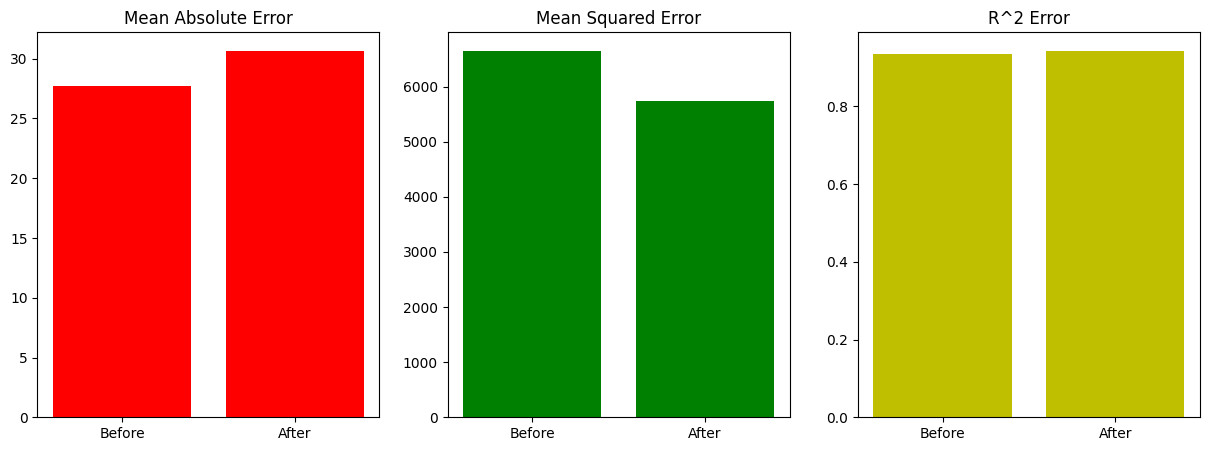

In [78]:
plot_labels = ["Before", "After"]


f, [ax1, ax2, ax3] = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1.bar(plot_labels,MAE1,color='r')
ax1.set_title("Mean Absolute Error")
ax2.bar(plot_labels,MSE1,color='g')
ax2.set_title("Mean Squared Error")
ax3.bar(plot_labels,R2,color='y')
ax3.set_title("R^2 Error")

